In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
sns.set_theme(style='darkgrid')
sns.set(rc={"figure.figsize": (7, 5)})

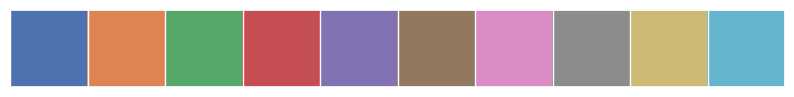

In [46]:
sns.color_palette()
sns.palplot(sns.color_palette())
plt.show()

In [47]:
tips_data = sns.load_dataset('tips')
tips_data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


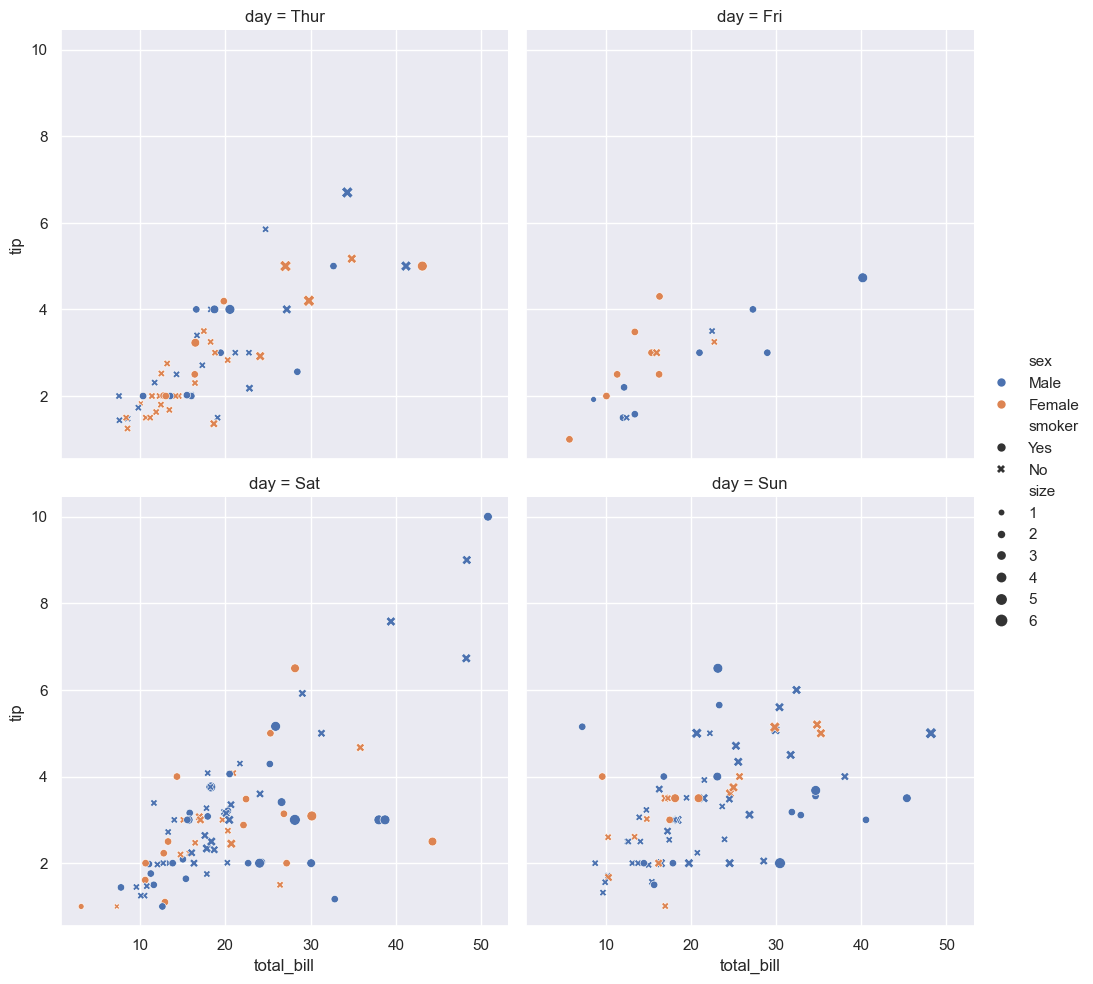

In [57]:
sns.relplot(tips_data, x='total_bill', y='tip', hue='sex', size='size', style='smoker',col='day',col_wrap=2,kind='scatter')

<Axes: xlabel='total_bill', ylabel='tip'>

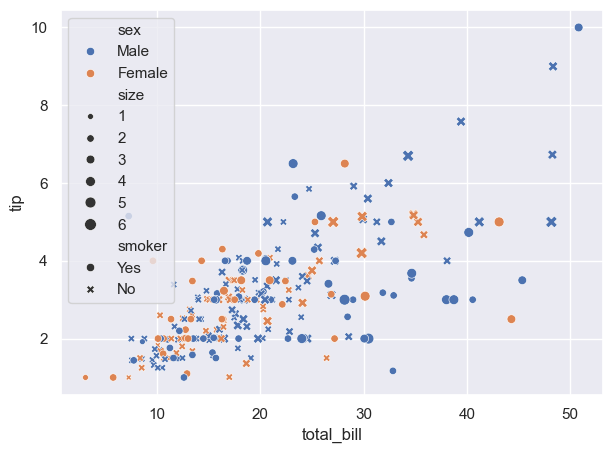

In [49]:
sns.scatterplot(tips_data, x='total_bill', y='tip', hue='sex', size='size', style='smoker')

In [58]:
dow_data = sns.load_dataset('dowjones')
dow_data

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45
...,...,...
644,1968-08-01,883.72
645,1968-09-01,922.80
646,1968-10-01,955.47
647,1968-11-01,964.12


<Axes: xlabel='Date', ylabel='Price'>

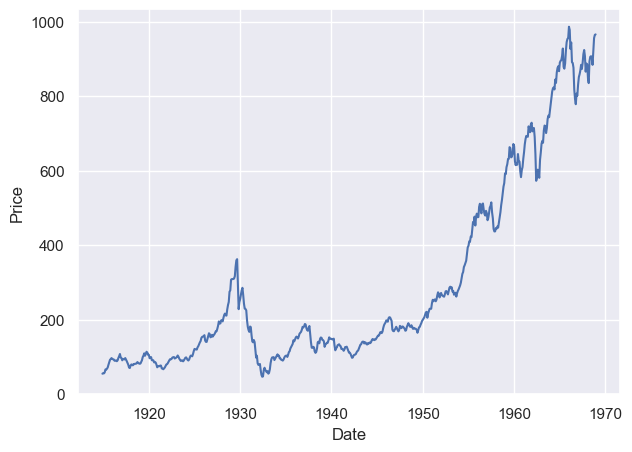

In [61]:
sns.lineplot(dow_data,x='Date', y='Price')

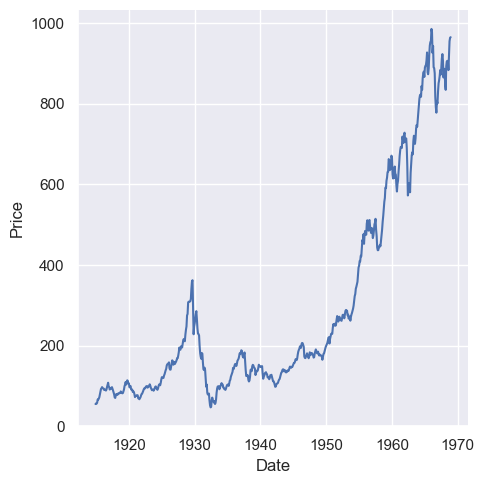

In [62]:
sns.relplot(dow_data, x='Date', y='Price', kind='line')

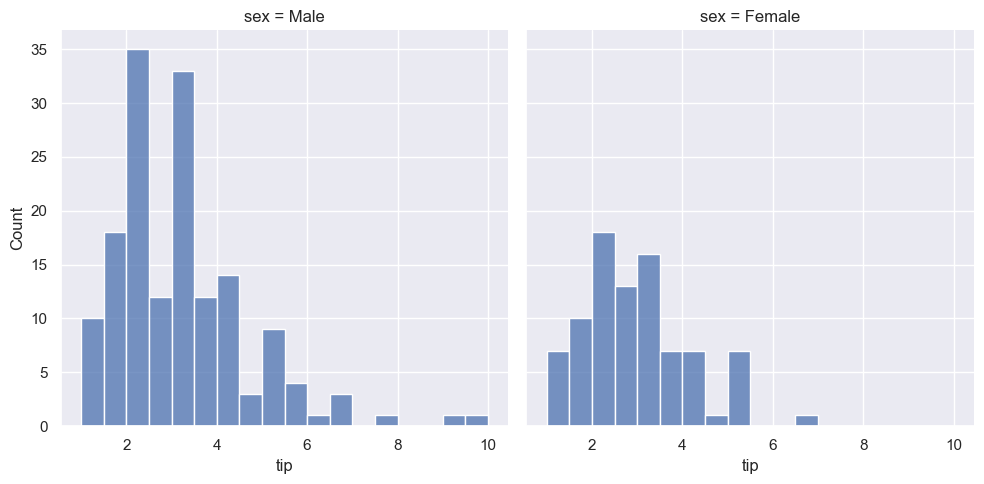

In [70]:
sns.displot(tips_data, x='tip',col='sex', kind='hist')

<Axes: xlabel='tip', ylabel='Count'>

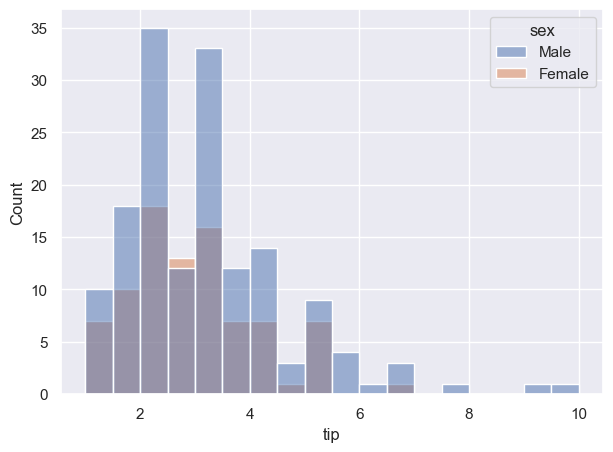

In [75]:
sns.histplot(tips_data, x='tip',hue='sex')

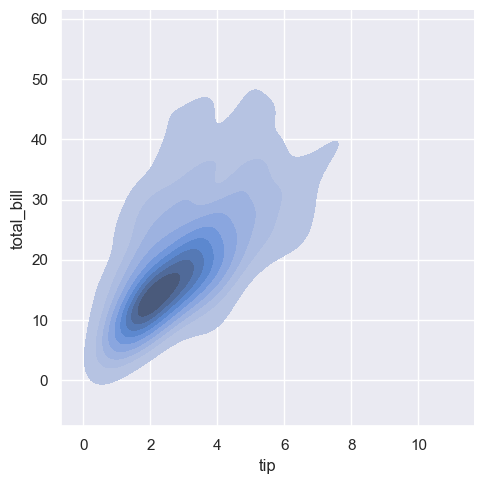

In [85]:
# sns.kdeplot(tips_data, x='tip')
# sns.kdeplot(tips_data, x='tip', y='total_bill', fill=True)
sns.displot(tips_data, x='tip', y='total_bill', fill=True, kind='kde')

<Axes: xlabel='tip', ylabel='Proportion'>

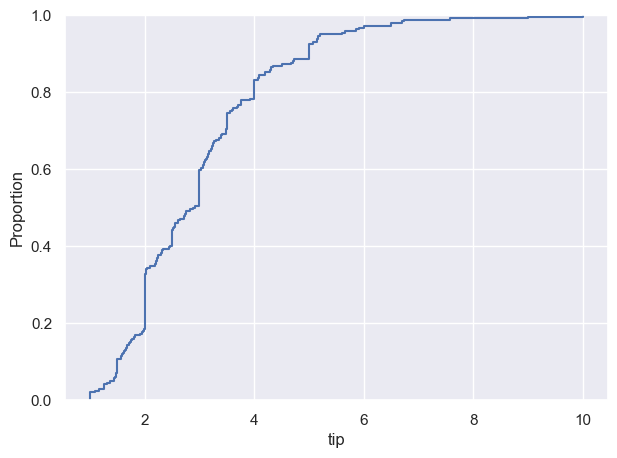

In [87]:
sns.ecdfplot(tips_data, x='tip')

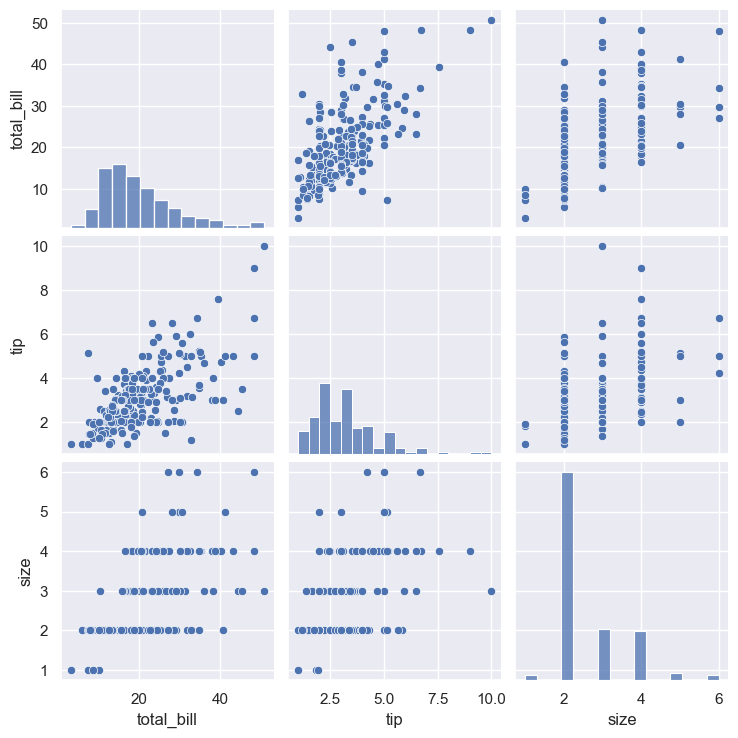

In [89]:
sns.pairplot(tips_data)
# day and sex not used cuz they are not encoded

In [102]:
titanic_data = sns.load_dataset('titanic')
titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [103]:
import pandas as pd

titanic_data.sex = titanic_data.sex.apply(lambda x: 1 if x == 'male' else 0)
titanic_data.alive = titanic_data.alive.apply(lambda x: 1 if x == 'yes' else 0 )
titanic_data.alone = titanic_data.alone.apply(lambda x: 1 if x else 0 )

titanic_data['class'] = titanic_data['class'].astype(pd.CategoricalDtype(categories=['First', 'Second', 'Third'], ordered=True)).cat.codes
titanic_data = titanic_data.drop(['embarked', 'who','adult_male', 'deck', 'embark_town'], axis=1)

In [104]:
titanic_data.corr()

,survived,pclass,sex,age,sibsp,parch,fare,class,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.338481,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,1.000000,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.131900,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.369226,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.083081,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.018443,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.549500,0.257307,-0.271832
class,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,1.000000,-0.338481,0.135207
alive,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.338481,1.000000,-0.203367
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.135207,-0.203367,1.000000


<Axes: >

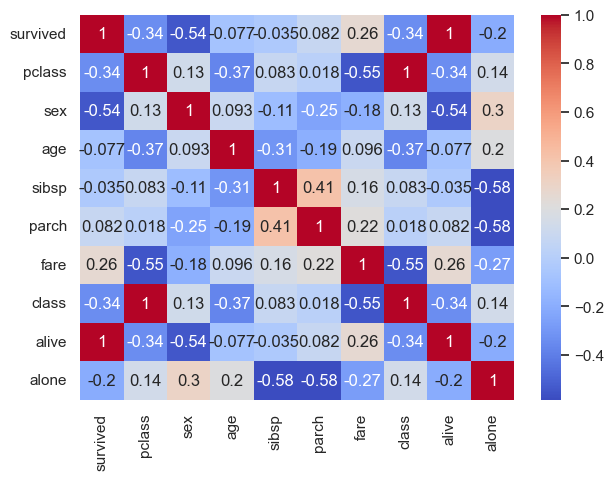

In [110]:
# plt.figure(figsize=(12,8))
sns.heatmap(titanic_data.corr(), annot=True, cmap='coolwarm')

In [124]:
iris = sns.load_dataset('iris')
iris
iris = iris.drop(columns='species', axis=1)

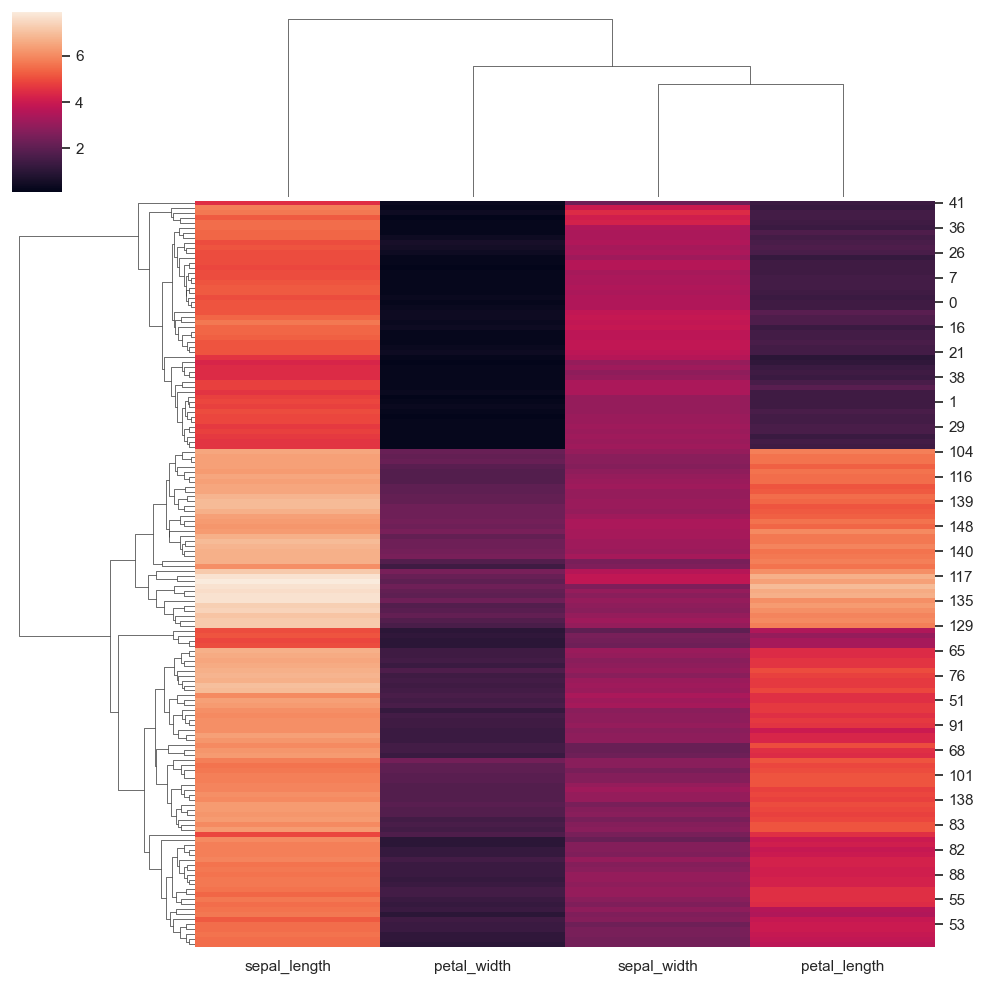

In [ ]:
sns.clustermap(iris)

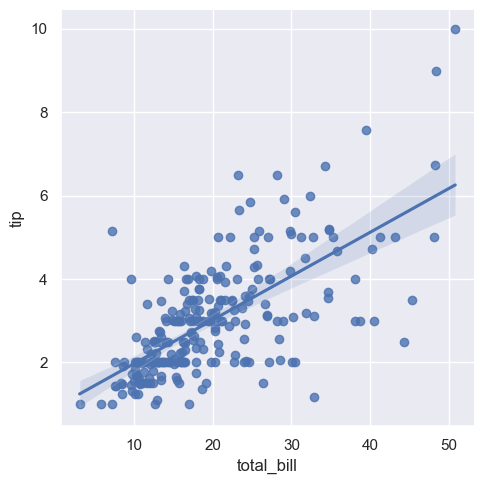

In [126]:
sns.lmplot(tips_data, x='total_bill', y='tip')